# Kyphosis Data Analysis
This data set consists of 81 observations of four variables (Age, Number, Kyphosis, Start) in children following corrective spinal surgery. The variable Kyphosis reports the absence or presence of this deformity.

## Import Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette="bright")

## Get the Data

In [44]:
df = pd.read_csv("mk016-project_kyphosis_data_analysis/kyphosis.csv")
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


## Exploratory Data Analysis

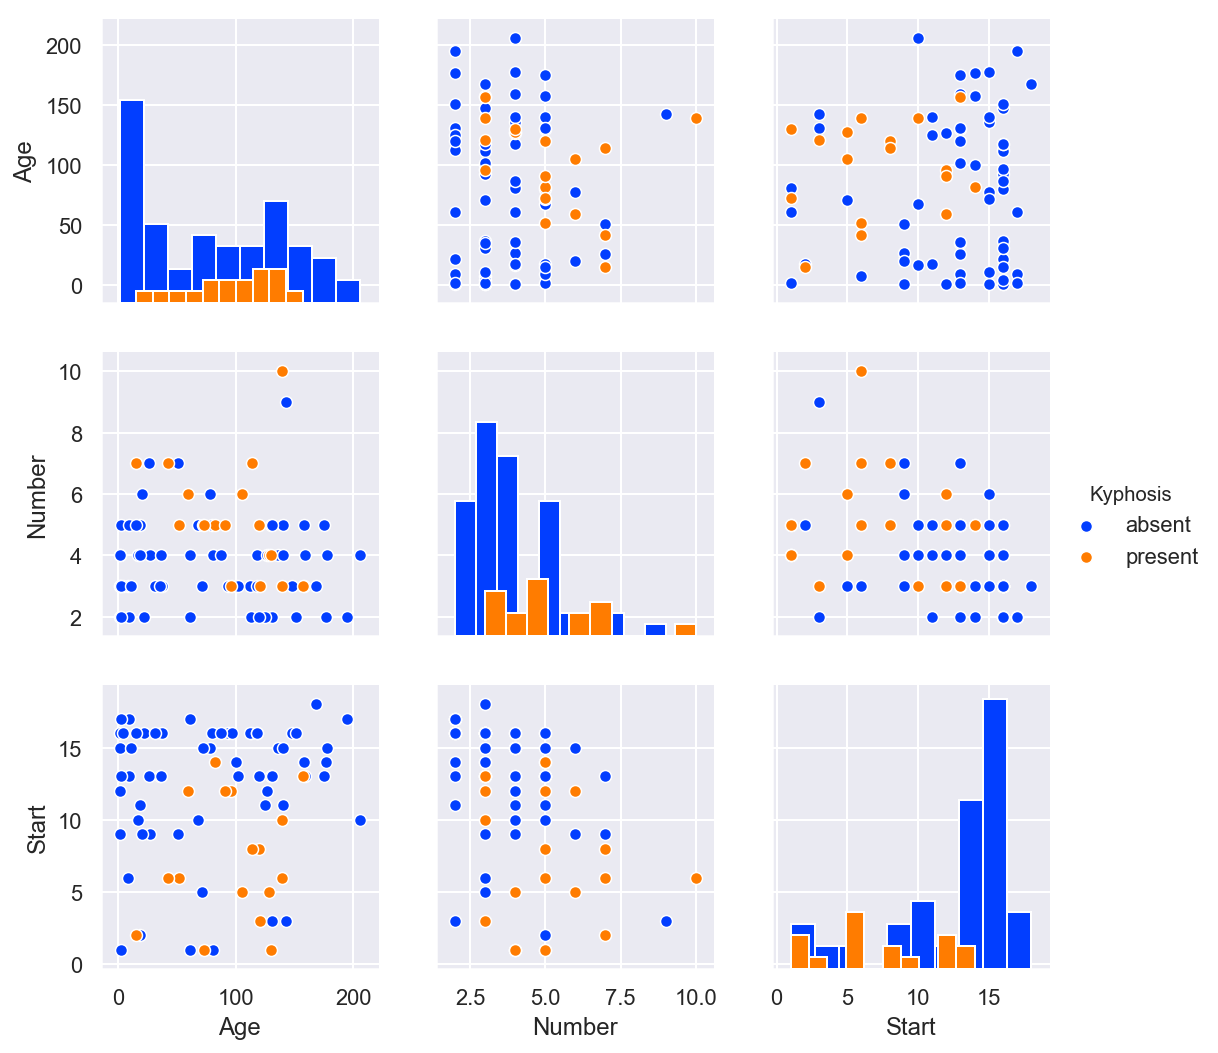

In [46]:
sns.pairplot(df, hue="Kyphosis", diag_kind="hist")

## Train Test Split

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = df.drop("Kyphosis", axis=1)
y = df["Kyphosis"]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Decision Trees

We'll start just by training a single decision tree.

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dtree = DecisionTreeClassifier()

In [52]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [53]:
predictions = dtree.predict(X_test)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [55]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.95      0.78      0.86        23
     present       0.17      0.50      0.25         2

   micro avg       0.76      0.76      0.76        25
   macro avg       0.56      0.64      0.55        25
weighted avg       0.88      0.76      0.81        25

[[18  5]
 [ 1  1]]
0.76


## Tree Visualization

In [56]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

In [57]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

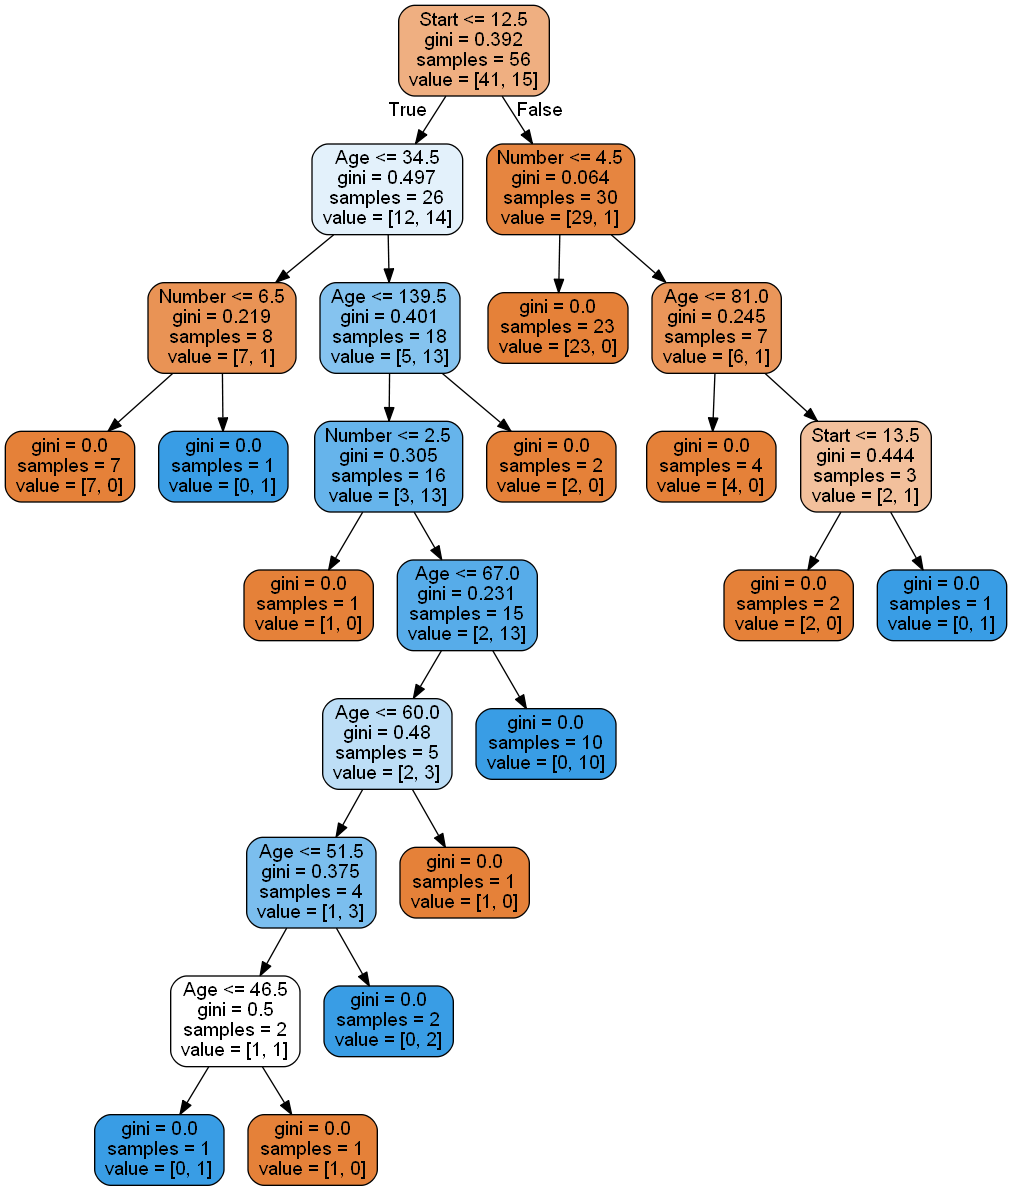

In [58]:
dot_data = StringIO()  
export_graphviz(dtree, 
                out_file=dot_data, 
                feature_names=features, 
                filled=True, 
                rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Random Forest

Now let's compare the decision tree model to a random forest.

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rfc = RandomForestClassifier(n_estimators=10)

In [61]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [62]:
rfc_pred = rfc.predict(X_test)

In [63]:
print(classification_report(y_test, rfc_pred))
print(confusion_matrix(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.95      0.83      0.88        23
     present       0.20      0.50      0.29         2

   micro avg       0.80      0.80      0.80        25
   macro avg       0.57      0.66      0.58        25
weighted avg       0.89      0.80      0.84        25

[[19  4]
 [ 1  1]]
0.8
